# Homework 4: Image Data Compression and K-Means

In this notebook, we will explore the three main matrix decomposition methods that we saw in lecture and apply them to the problem of image compression. Our running example will be "Lena" AKA "Lenna", an image that has become a classic in the image processing community.

In [1]:
# Popular imports, you may modify this if you need to add things

# For image processing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

# For clustering
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA, NMF

## Step 0: Importing  and Reshaping the Data

A color image can be thought of as a three dimensional array of values. These dimensions are the horizontal position of the pixel ($x$), the vertical dimension of the pixel ($y$), and the channel (red, green, or blue). 

**Note**: We need 2D arrays for our matrix operations to work and 3D arrays to display (i.e. plot using `imshow()`) the image. So the later sections and visible tests will check for both versions

In the cell below:

We have already called `plt.imread()` to load `lena.png` into the variable `lena_3D_arr` into the first cell for you.
1. Multiply the values of this array by 255 (second cell onwards)
2. Convert the array to an array of integers.
3. Use `plt.imshow()` to display the image.
4. Use `lena_3D_arr.shape` to store the dimensions of the image as `x_size`, `y_size`, and `channels`.
5. Use `lena_3D_arr.reshape()` to transform the 3D array into our typical item (pixels) as rows and features (channels) as columns 2D matrix. Store the result as `lena_2D_arr`.



In [2]:
# Part 1: Import lena_3D_arr ONLY

try: 
    # We've done this step already for you
    lena_3D_arr = plt.imread('lena.png')
except:
    # For grading only
    try:
        lena_3D_arr = plt.imread('https://s3.amazonaws.com/cis545-hw4data/lena.png')
    except:
        print("AWS S3 not initialized for grading")

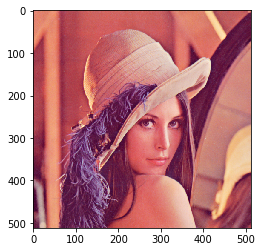

In [3]:
# TODO: Reshape the image by manipulating lena_3D_arr (5 points)
# Use the existing lena_3D_arr object

# YOUR CODE HERE
# raise NotImplementedError()

# multiply by 255 & convert to nearest integer
lena_3D_arr = np.round(lena_3D_arr*255).astype(int)
# display the image
plt.imshow(lena_3D_arr)
# set gold_lena_3D_arr to the original 3D image
gold_lena_3D_arr = lena_3D_arr.copy()
# store shape info
x_size = lena_3D_arr.shape[0]
y_size = lena_3D_arr.shape[1]
channels = lena_3D_arr.shape[2]
# transform
lena_2D_arr = lena_3D_arr.reshape(x_size*y_size,channels)

In [4]:
# CIS 545 Test Cases

if (lena_3D_arr.shape != (512, 512, 3)):
    raise ValueError('Expected something different than', lena_3D_arr.shape)

if (lena_2D_arr.shape != (262144, 3)):
    raise ValueError('Expected something different than', lena_2D_arr.shape)

In [5]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [6]:
# CIS 545 Test Cases


In [7]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


## Step 1: Scaling the Data

Now, looking at the image, you may notice that the colors seem out of balance. This is a reminder that your datasets will commonly have differing ranges of values among their features. We will cover two main ways to address this.

### Step 1.1: Minmax Scaling

The simpler of the two approaches linearly maps the values to the real numbers between 0 and 1. Please implement this in two ways. The first step in each function is to create a deep copy of the image using `image.copy()`. Then,

1. Do minmax scaling by hand. Name this function `rescale_2D(image)`. In this function, divide each value of `image` by the size of the original range of values in `image`. Then subtract off the new minimum.
2. Use the minmax scaler (part of sklearn.preprocessing). Name this function `minmax_image(image)`. You will need to cast your `image` to floats using the attribute `.astype(float)`.

Afterwards, in each of these functions, multiply the resulting image by 255 and cast the values to integers.

These functions should return different things because `rescale_2D` should scale all channels at once and `minmax_image` should scale each channel individually.

**Finally, use `imshow()` to display (plot) the image of Lena after applying `minmax_image(image)`.**

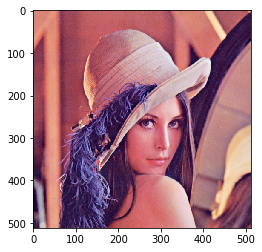

In [8]:
# TODO: Write the minmax_image and rescale_2D functions. Plot the result of minmax scaling on Lena. (5 points)

# input: 2d-image, output: 2d-int-image
def rescale_2D(image):
    img = image.copy()
    size = np.max(img) - np.min(img)
    img = (img/size).astype(float)
    min_val = np.min(img)
    img -= min_val
    return np.round(img*255).astype(int)

# input: 2d-image, output: 2d-int-image
def minmax_image(image):
    img = image.copy().astype(float)
    img = preprocessing.MinMaxScaler().fit_transform(img)
    return np.round(img*255).astype(int)

# construct the image
minmax_lena_2D_arr = minmax_image(lena_2D_arr)
minmax_lena_3D_arr = minmax_lena_2D_arr.reshape(x_size,y_size,channels)

# plot the image
plt.imshow(minmax_lena_3D_arr)

In [9]:
# CIS 545 Test Case

if (minmax_lena_3D_arr.shape != (512, 512, 3)):
    raise ValueError(minmax_lena_3D_arr.shape, "is not the same as the original image")

if (type(minmax_lena_3D_arr[0][0][0]) != type(gold_lena_3D_arr[0][0][0])):
    raise TypeError('Expected integers not', type(minmax_lena_3D_arr[0][0][0]))

In [10]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [11]:
# CIS 545 Test Case
    

In [12]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


### Step 1.2: Standard Scaling

Now, write a new function `standard_image(image)`. As before, make a deep copy of the image. Then, apply the standard scaler (part of sklearn.preprocessing). Name this function `standard_image(image)`. As before, you will need to cast your image to floats using the attribute `.astype(float)`.

This scaler subtracts the mean and divides by the standard deviation, essentially converting the values of your dataset into $z$-scores. Therefore, you can expect values between $-3$ and $3$. As such, you will need to apply `rescale_2D()` to the resultant values before displaying the scaled image.

**Again, use `imshow()` to display (plot) the image of Lena after applying `standard_image(image)`. Between the two versions of Lena that came out of these scalers, which do you prefer?**

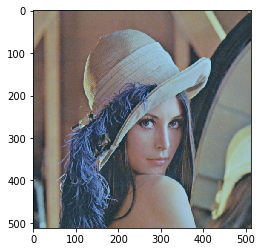

In [13]:
# TODO: Write the standard_image function. Plot the result of standard scaling on Lena. (5 points)
def standard_image(image):
    img = image.copy().astype(float)
    img = preprocessing.StandardScaler().fit_transform(img)
    return img

# construct the image
standard_lena_2D_arr = rescale_2D(standard_image(lena_2D_arr))
standard_lena_3D_arr = standard_lena_2D_arr.reshape(x_size,y_size,channels)

# plot the image
plt.imshow(standard_lena_3D_arr)

In [14]:
# CIS 545 Test Case

if (standard_lena_3D_arr.shape != (512, 512, 3)):
    raise ValueError(standard_lena_3D_arr.shape, "is not the same as the original image")

if (type(standard_lena_3D_arr[0][0][0]) != type(gold_lena_3D_arr[0][0][0])):
    raise TypeError('Expected integers not', type(standard_lena_3D_arr[0][0][0]))

In [15]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [16]:
# CIS 545 Test Case
    

In [17]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


## Step 2: Matrix Decomposition

Now that we have scaled the data, it is time to consider dimensionality reduction via matrix decomposition. Take a moment to think to yourself about what this means in the realm of image processing. What are the features that we are reducing?

### Step 2.1: PCA

To help you answer this question, the following cell will plot explained variance versus number of PCA dimensions.

[ 90.2  99.1 100. ]


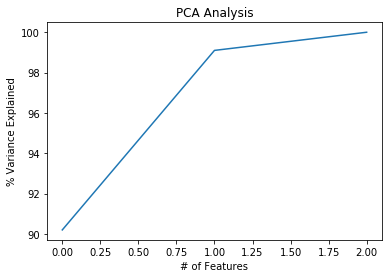

In [18]:
# No need to edit this - this is PCA example!

X_forExploringPCA = lena_2D_arr.copy()
pca_model = PCA(n_components = 3)
pca_model.fit(X_forExploringPCA)
variance = pca_model.explained_variance_ratio_ #calculate variance ratios                                         

var = np.cumsum(np.round(pca_model.explained_variance_ratio_, decimals=3)*100)
print(var) #cumulative sum of variance explained with [n] features                                                          

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [19]:
print('CIS 545 Cell Padding')

CIS 545 Cell Padding


Does this graph make sense? It shows that we really don't have too many options when it comes to number of PCA dimensions. In fact, there are really only two reasonable values. In the cell below, assign a value to `cutoff` for an appropriate number of PCA dimensions.

In [20]:
cutoff = 2 # You shoud edit this!
# YOUR CODE HERE
# raise NotImplementedError()

In [21]:
# CIS 545 Test Case

if (cutoff < 1):
    raise ValueError('Cutoff value must be a positive number')
    

In [22]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


Complete the function `pca_lena(data, n_components)` below. This function should make a deep copy of the dataset, initialize a PCA model, and run the decomposition. The function should return the three truncated SVD matrices. For example:

`return U, np.diag(model.singular_values_), model.components_`

where, `U` is the first matrix of orthogonal columns, `np.diag(model.singular_values_)` is the middle, diagonal matrix, and `model.components_` is the last, invertible matrix.

**Then, plot the standard-scaled Lena without PCA, standard-scaled Lena with 2 PCA components, and standard-scaled Lena with 1 PCA component.** Our visible tests will check that `pca_lena_3D_arr` has the correct shape and types. As you consider these outputs remember that PCA requires orthogonal dimensions, which, in this case, means orthogonal colors. Do you think the colors should be orthogonal in this image?

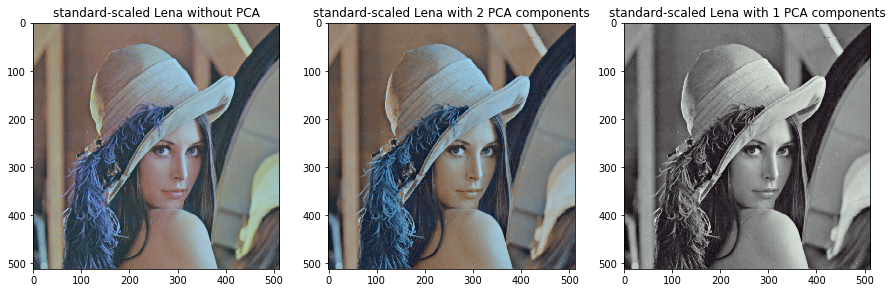

In [23]:
# TODO: Complete the pca_lena function and plot 3 versions of Lena. (5 points)

def pca_lena(data, n_components):
    X = data.copy()
    X_std = standard_image(data)
    pca = PCA(n_components = n_components)
    X_pca = pca.fit_transform(X_std)
    S_inv = np.diag(1 / pca.singular_values_)
    U = X_pca.dot(S_inv)
    return U, np.diag(pca.singular_values_), pca.components_
                       
# define figure size and subplot position
nrows = 1
ncols = 3
plt.figure(figsize = (15,15))

# plot the standard-scaled Lena without PCA
plt.subplot(nrows,ncols,1).set_title("standard-scaled Lena without PCA")
plt.imshow(standard_lena_3D_arr)

# plot the standard-scaled Lena with n_components PCA components
n_components = 1
U, S, V = pca_lena(lena_2D_arr, n_components)
pca_lena_2D_arr = rescale_2D( U.dot(S).dot(V) )
pca_lena_3D_arr = pca_lena_2D_arr.reshape(x_size,y_size,channels)
plt.subplot(nrows,ncols,4-n_components).set_title("standard-scaled Lena with " + str(n_components) + " PCA components")
plt.imshow(pca_lena_3D_arr)

n_components = 2
U, S, V = pca_lena(lena_2D_arr, n_components)
pca_lena_2D_arr = rescale_2D( U.dot(S).dot(V) )
pca_lena_3D_arr = pca_lena_2D_arr.reshape(x_size,y_size,channels)
plt.subplot(nrows,ncols,4-n_components).set_title("standard-scaled Lena with " + str(n_components) + " PCA components")
plt.imshow(pca_lena_3D_arr)

# YOUR CODE HERE
# raise NotImplementedError()

In [24]:
for i in range(10):
    print(i, pca_lena_2D_arr[i], standard_lena_2D_arr[i])

0 [146 140 130] [152 143 137]
1 [146 140 130] [152 143 137]
2 [142 143 138] [149 143 147]
3 [142 140 133] [149 142 141]
4 [147 138 126] [152 144 132]
5 [146 133 119] [152 137 127]
6 [148 140 128] [153 144 135]
7 [146 139 128] [153 141 136]
8 [147 142 133] [153 145 140]
9 [146 136 124] [151 142 130]


In [25]:
# CIS 545 Test Case

if (pca_lena_3D_arr.shape != (512, 512, 3)):
    raise ValueError(pca_lena_3D_arr.shape, "is not the same as the original image")

if (type(pca_lena_3D_arr[0][0][0]) != type(gold_lena_3D_arr[0][0][0])):
    raise TypeError('Expected integers not', type(pca_lena_3D_arr[0][0][0]))

In [26]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [27]:
# CIS 545 Test Case
    

In [28]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


### Step 2.2: NMF

If you implemented PCA correctly, you should be convinced that orthogonal colors is an unreasonable requirement for an image representations. Therefore, we will also use NMF and compare the results. As before, complete the `nmf_lena(data, n_components)` function. This function should create a deep copy of the data, initialize the model with `init='random'` and `random_state=0`, and then run the decomposition. The function should returns the items by components matrix ($W$) and the components by features matrix ($H$, here named `model.components_`). For example:

`return W, model.components_`

**Then, plot the standard-scaled Lena without NMF, standard-scaled Lena with 2 NMF components, and standard-scaled Lena with 1 NMF component.** Our visible tests will check that `nmf_lena_3D_arr` has the correct shape and types. These NMF components do not have to be orthogonal, so this decomposition essentially selects important colors for the image and represents the other colors in terms of the important ones.

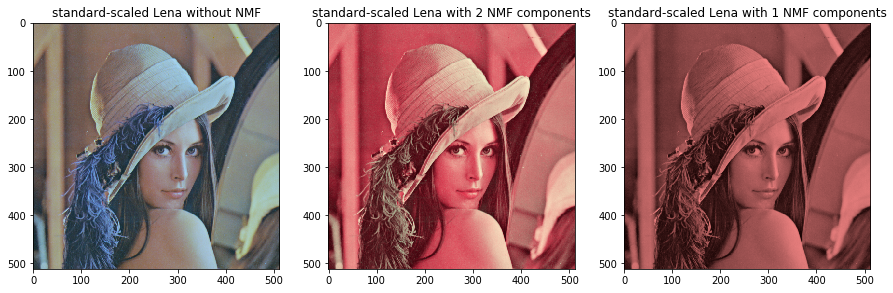

In [29]:
# TODO: Complete the nmf_lena function and plot 3 versions of Lena. (5 points)

def nmf_lena(data, n_components):
    X = data.copy()
    nmf = NMF(n_components=n_components, init='random', random_state=0)
    W = nmf.fit_transform(X)
    return W, nmf.components_

# define figure size and subplot position
nrows = 1
ncols = 3
plt.figure(figsize = (15,15))

# plot the standard-scaled Lena without PCA
plt.subplot(nrows,ncols,1).set_title("standard-scaled Lena without NMF")
plt.imshow(standard_lena_3D_arr)

# plot the standard-scaled Lena with n_components PCA components
n_components = 1
W,H = nmf_lena(lena_2D_arr, n_components)
nmf_lena_2D_arr = rescale_2D( W.dot(H) )
nmf_lena_3D_arr = nmf_lena_2D_arr.reshape(x_size,y_size,channels)
plt.subplot(nrows,ncols,4-n_components).set_title("standard-scaled Lena with " + str(n_components) + " NMF components")
plt.imshow(nmf_lena_3D_arr)

n_components = 2
W,H = nmf_lena(lena_2D_arr, n_components)
nmf_lena_2D_arr = rescale_2D( W.dot(H) )
nmf_lena_3D_arr = nmf_lena_2D_arr.reshape(x_size,y_size,channels)
plt.subplot(nrows,ncols,4-n_components).set_title("standard-scaled Lena with " + str(n_components) + " NMF components")
plt.imshow(nmf_lena_3D_arr)

# YOUR CODE HERE
# raise NotImplementedError()

In [30]:
for i in range(10):
    print(i, nmf_lena_2D_arr[i], pca_lena_2D_arr[i], standard_lena_2D_arr[i])

0 [223 123 123] [146 140 130] [152 143 137]
1 [223 123 123] [146 140 130] [152 143 137]
2 [221 127 125] [142 143 138] [149 143 147]
3 [220 124 123] [142 140 133] [149 142 141]
4 [222 122 121] [147 138 126] [152 144 132]
5 [222 113 116] [146 133 119] [152 137 127]
6 [224 123 123] [148 140 128] [153 144 135]
7 [224 120 121] [146 139 128] [153 141 136]
8 [224 126 125] [147 142 133] [153 145 140]
9 [221 120 120] [146 136 124] [151 142 130]


In [31]:
# CIS 545 Test Case

if (nmf_lena_3D_arr.shape != (512, 512, 3)):
    raise ValueError(nmf_lena_3D_arr.shape, "is not the same as the original image")

if (type(nmf_lena_3D_arr[0][0][0]) != type(gold_lena_3D_arr[0][0][0])):
    raise TypeError('Expected integers not', type(nmf_lena_3D_arr[0][0][0]))

In [32]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [33]:
# CIS 545 Test Case
    

In [34]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


## Step 3: K-means

So far, we have achieved a compression rate of approximately 1.5 to 1. So let's see if we can beat that with clustering. We will first test on small $k$ values and then visualize larger ones.

Recall that in class, we described running k-means and plotting the $SS_W$ (sum of squared error given Euclidean distance between the data points and cluster centers).  From that we might find the "elbow" indicating a possibly optimal number of clusters. You will see that running $k$-means on over 200,000 items can be rather time consuming, so we will just carefully evaluate up to 8 clusters.

### Step 3.1: The Original Image

In the cell below, define a function called `test_cluster_size` that iterates over the numbers of clusters in the array `num_clusters`. The function should takes as input (1) the data as a matrix and (2) the `num_clusters` array. 

Use `km = KMeans(n_clusters=i, init='k-means++', n_init=30, max_iter=10, tol=1e-4, random_state=0, n_jobs=1)` to initialize each kmeans model. Then, simply call the `fit` method over the data to generate clusters.  

Note from the `sklearn.cluster` documentation on __[KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)__:

Attributes:	
* `cluster_centers_` : array, [n_clusters, n_features]
 Coordinates of cluster centers

* `labels_` :
Labels of each point

* `inertia_` :
Sum of squared distances between data points and their cluster centers ($SS_W$)

Since each of these cluster centers represents a color, convert these into lists of integers between 0 and 255. Then, compute $SS_W$ by hand. This integer conversion will result in an integer $SS_W$, so you won't be able to use `inertia_` in this subsection.

Then, use your integer cluster centers and `labels_` to construct the compressed image and display it. This part will not be graded but it is an excellent way to visualize what kmeans is doing.

Finally, return a list of scores, **where `max_cluster[i]` is the integer** $SS_W$ **for cluster size `num_clusters[i]`**.  This is what we will test during grading.

num_clusters	SS_W		inertia_
2		607199964	607084649.4081532
3		338474714	338399057.6031212
4		214463112	214402581.7684357
5		166681913	166647419.25537014
6		137570878	137536502.24653777
7		118858794	118788127.93353027
8		104748826	104691893.97321495


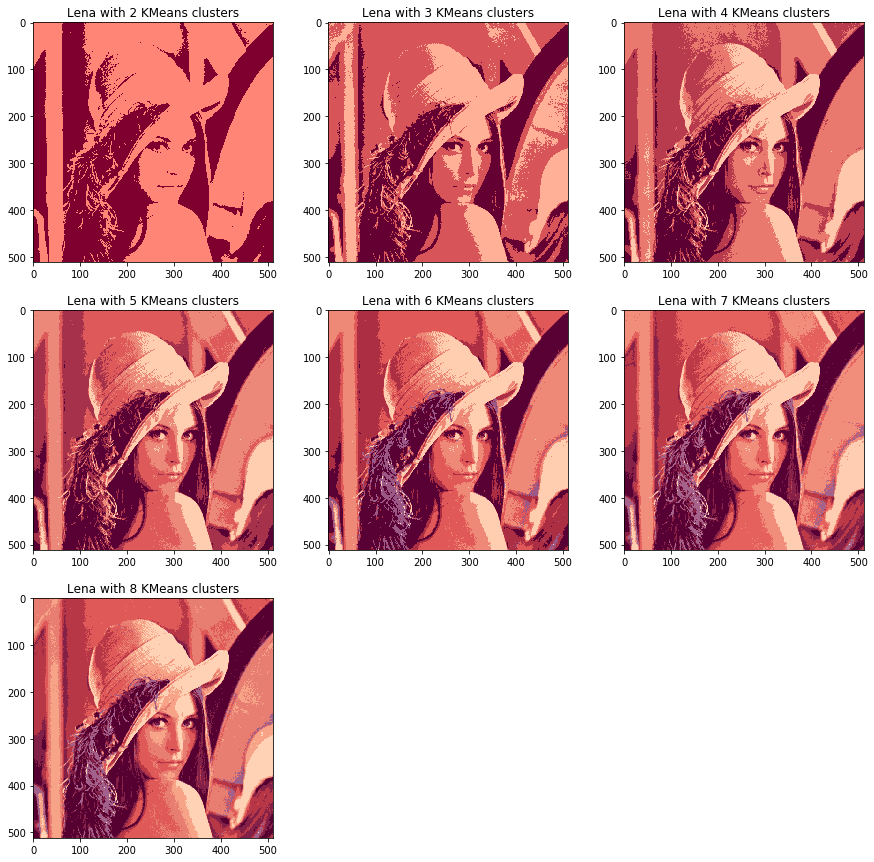

In [35]:
# TODO: Write test_cluster_size

# return squared L2 distance between a and b
def L2_dist_squared(a,b):
#     assert a.shape == b.shape
#     assert len(a.shape) == 1
    output = 0
    for i in range(a.shape[0]):
        diff = a[i]-b[i]
        diff *= diff
        output += diff
    return int(output)
      
def test_cluster_size(data, num_clusters, components=None):
    X = data.copy()
    max_cluster = []
    print( 'num_clusters' + '\t' + 'SS_W' + '\t\t' + 'inertia_')
    # prepare plot info
    ncols = 3
    nrows = int( (len(num_clusters)+ncols-1) / ncols ) # get the ceiling as the number of rows
    plt.figure(figsize = (15,15))
    # iterate through num_clusters
    for i in range(len(num_clusters)):
        # build cluster
        k = num_clusters[i]
        km = KMeans(n_clusters=k, init='k-means++', n_init=30, max_iter=10, tol=1e-4, random_state=0, n_jobs=1)
        km.fit(X)
        # convert cluster centers to integer
        int_cluster_centers = np.round(km.cluster_centers_).astype(int)
        # compute SS_W and labels matrix
        SS_W = 0
        labels_mat = np.zeros( shape=(len(X),k), dtype=int )
        counter = 0
        for j in km.labels_:
            SS_W += L2_dist_squared(X[counter],int_cluster_centers[j])
            labels_mat[counter][j] = 1
            counter += 1
        # append SS_W to max_cluster
        max_cluster.append(SS_W)
        print( str(k) + '\t\t' + str(SS_W) + '\t' + str(km.inertia_) )
        # plot lena
        kmeans_lena_2D_arr = rescale_2D( labels_mat.dot(int_cluster_centers) )
        kmeans_lena_3D_arr = kmeans_lena_2D_arr.reshape(x_size,y_size,channels)
        plt.subplot(nrows,ncols,i+1).set_title("Lena with " + str(k) + " KMeans clusters")
        plt.imshow(kmeans_lena_3D_arr)
    return max_cluster

# YOUR CODE HERE
# raise NotImplementedError()

num_clusters = [2,3,4,5,6,7,8]
ssws31 = test_cluster_size(lena_2D_arr, num_clusters)

In [36]:
# CIS 545 Test Case

display(ssws31)

if (len(ssws31) != 7):
    raise ValueError("Did not compute SSWs for the given values of k.")

[607199964, 338474714, 214463112, 166681913, 137570878, 118858794, 104748826]

In [37]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


In [38]:
# CIS 545 Test Case


In [39]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


### Step 3.2: The Standard Image

Let's apply your function again, this time to the image after "standard" scaling. Do you expect larger or smaller $SS_W$s? How do the compressed images compare?

num_clusters	SS_W		inertia_
2		491043533	490924255.20927244
3		277136351	277050178.9424023
4		178987369	178909894.47461432
5		142930183	142849526.4123284
6		114486360	114399750.9510763
7		101580781	101511521.72829573
8		89660452	89586133.07462333


[491043533, 277136351, 178987369, 142930183, 114486360, 101580781, 89660452]

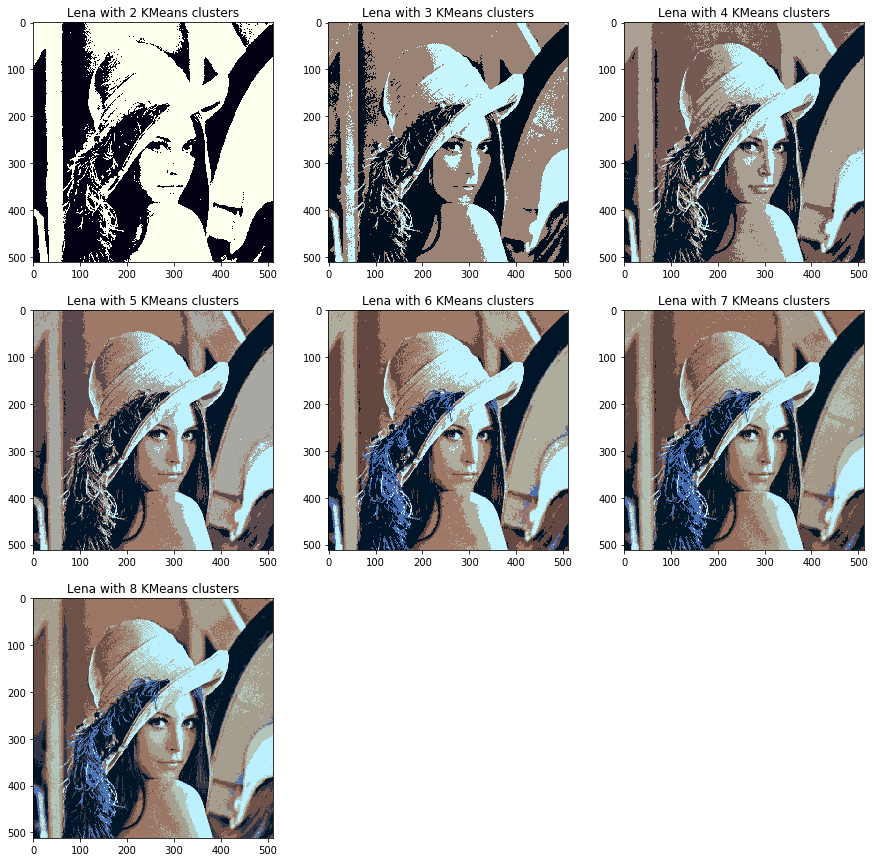

In [40]:
# Just run this cell!

num_clusters = [2,3,4,5,6,7,8]
ssws32 = test_cluster_size(standard_lena_2D_arr, num_clusters)
display(ssws32)

In [41]:
print('CIS 545 Cell Padding')

CIS 545 Cell Padding


### 3.3: Finding the Elbow

The following provided code helps you plot the number of clusters (from 2 to 8) versus $SS_W$. You may run it on your $SS_W$s from the original or the standard image. The curves should be about the same shape. 

In the cell below, choose the best number of clusters by finding an elbow in the graph. Here is a possible mathematical definition of elbow:

$$\hat{k}_{SSW} = \underset{k}{\operatorname{argmax}} \frac{SS_W(k-1) + SS_W(k+1) - 2 * SS_W(k)}{SS_W(k-1) - SS_W(k)}$$

This is not a perfect mathematical definition. So you are welcome to implement something else if you wish, or choose a $\hat{k}_{SSW}$ for this set of $SS_W$s by visual inspection. We have decided that two values are "correct" for purposes of grading. Store your chosen number of clusters in the variable `khat33`.

Hint, for those of you that use this: a "negative infinity" value is `numpy.NINF` (or np if you import it as such earlier) - just using lowercase may not work...

I have chosen to have 4 clusters.


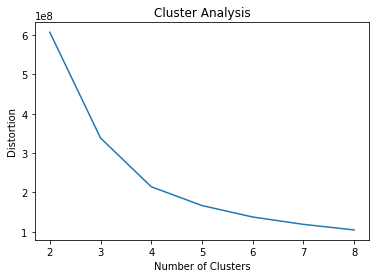

In [42]:
# TODO: Choose the best number of clusters. (5 points)
# You don't have to modify plot_clusters

def plot_clusters(num_clusters, distortions):
    plt.figure()
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Cluster Analysis')
    plt.style.context('seaborn-whitegrid')
    plt.plot(num_clusters, distortions)
    plt.show()

# YOUR CODE HERE
# raise NotImplementedError()

ssw = ssws31
cur_max = np.NINF
khat33 = -1
for i in range(1,len(num_clusters)-1):
    elbow = ( ssw[i-1] + ssw[i+1] - 2*ssw[i] ) / ( ssw[i-1]-ssw[i] )
    if(elbow > cur_max):
        cur_max = elbow
        khat33 = num_clusters[i]
# khat33 = 4
print("I have chosen to have", khat33, "clusters.")
plot_clusters(num_clusters, ssws31)

In [43]:
# CIS 545 Test Case

if ((khat33 < 2) or (khat33 > 8)):
    raise ValueError('k hat is not in the right range')
    

In [44]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


## Step 4: The Variance Ratio Criterion

Recall the Variance Ratio Criterion ($VRC$), given by

$$ VRC(k) = \frac{SS_B}{k-1} / \frac{SS_W}{N - k}$$

where $SS_B$ is the sum of squared distance between the cluster centers and the grand mean (calculated per data point), $k$ is the number of clusters, $SS_W$ is the sum of squared distance between data points and their assigned cluster centers, and $N$ is the number of data points.


### Step 4.1: The Grand Mean

As a quick check, please compute the grand mean of the original, minmax, and standard datasets in the cell below. Store them as a numpy arrays of floats (not a list) in the variables `original_grand_mean`, `min_max__grand_mean`, and `standard_grand_mean` so we can test them. Do not use loops.

In [60]:
# TODO: Compute the 3 grand means. (2 points)

original_grand_mean = np.mean( lena_2D_arr, axis=0 )
min_max__grand_mean = np.mean( minmax_lena_2D_arr, axis=0 ) # Be careful on the spelling of this one!
standard_grand_mean = np.mean( standard_lena_2D_arr, axis=0 )

# YOUR CODE HERE
# raise NotImplementedError()

array([180.22365952,  99.05121613, 105.41025162])

array([160.13450623,  99.97512817, 114.46959686])

array([114.47420502, 114.46458817, 114.46959686])

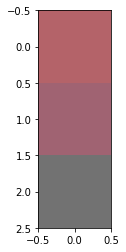

In [61]:
# CIS 545 Test Case

display(original_grand_mean, min_max__grand_mean, standard_grand_mean)
plt.figure()
plt.imshow([[original_grand_mean/255], [min_max__grand_mean/255], [standard_grand_mean/255]])


In [47]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


### Step 4.2 Implementing VRC

Write a function `test_vrc(data, max_num_cluster)` that computes the $VRC$ on clusterings of size 2 up to size `max_num_cluster`. Since we are passing in the data, compute a new grand mean within the function. However, since the grand mean does not depend on the clusters, you should not compute it within a loop. For $SS_W$ in this subsection, you may use the built in `inertia_` value, but please compute $SS_B$ on your own. Just as a warning, it is expected that your $SS_W$ and $SS_B$ may not add up to exactly the same number every time, but they should not change too much.

In [53]:
# TODO: Write the test_vrc function.

def test_vrc(data, num_clusters):
    X = data.copy()
    n = len(X)
    grand_mean = np.mean( X, axis=0 )
    vrcs = []
    print( 'num_clusters' + '\t' + 'SS_B' + '\t\t' + 'SS_W' + '\t\t\t' + 'vrc')
    # iterate through num_clusters
    for i in range(len(num_clusters)):
        # build cluster
        k = num_clusters[i]
        km = KMeans(n_clusters=k, init='k-means++', n_init=30, max_iter=10, tol=1e-4, random_state=0, n_jobs=1)
        km.fit(X)
        # compute SS_B
        SS_B = 0
        for j in km.labels_:
            SS_B += L2_dist_squared(grand_mean, km.cluster_centers_[j])
        # compute vrc
        vrc = ( SS_B/(k-1) ) / ( km.inertia_/(n-k) )
        vrcs.append(vrc)
        print( str(k) + '\t\t' + str(SS_B) + '\t' + str(km.inertia_) + '\t' + str(vrc) )
    return vrcs
    
# YOUR CODE HERE
# raise NotImplementedError()

In [54]:
# Again, you can just run this cell!

num_clusters = [2,3,4,5,6,7,8]
vrcs43 = test_vrc(lena_2D_arr, num_clusters)

num_clusters	SS_B		SS_W			vrc
2		1060766720	607084649.4081532	458044.0467162725
3		1330469286	338399057.6031212	515324.3504453972
4		1451915855	214402581.7684357	591729.8493491255
5		1501349204	166647419.25537014	590411.4518333197
6		1530390290	137536502.24653777	583370.1501597097
7		1548962861	118788127.93353027	569698.4546597721
8		1561900717	104691893.97321495	558687.5528795045


In [55]:
print('CIS 545 Cell Padding')

CIS 545 Cell Padding


### Step 4.3: Selecting a number of clusters with VRC

Plot the number of clusters (from 2 to 8) versus $VRC$.  Set $\hat{k}_{VRC}$ to the number of clusters recommended by $VRC$. Store that in the variable `khat43`. Note that you are now looking for the first local maximum, so your elbow method probably should not be used again. As before, for the extra challenge, you can implement a function that finds the value of $k$ that corresponds to the most maximum-like VRC. Or, you can just look at the graph (visual inspection) and assign the right value to the variable `khat43`.

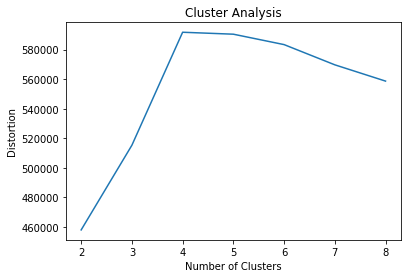

I have chosen to have 4 clusters.


In [57]:
# TODO: Select the number of clusters according to VRC. (8 points)

plot_clusters(num_clusters, vrcs43)

khat43 = 4

# YOUR CODE HERE
# raise NotImplementedError()

print("I have chosen to have", khat43, "clusters.")

In [58]:
# CIS 545 Test Case

if ((khat43 < 2) or (khat43 > 8)):
    raise ValueError('k hat is not in the right range')
    

In [59]:
print('CIS 545 Test Case Padding')

CIS 545 Test Case Padding


## Step 5: More Clusters and Summary

Use the code below to run kmeans with the values 16, 32, and 64 on `standard_lena_2D_arr` and display the resulting images. How large of a $k$ can we have while keeping the clustered image smaller than the original? Do we need that many?

num_clusters	SS_W		inertia_
16		46757668	46687938.20608239
32		26309203	26239467.389716454
64		15741825	15668498.39261832


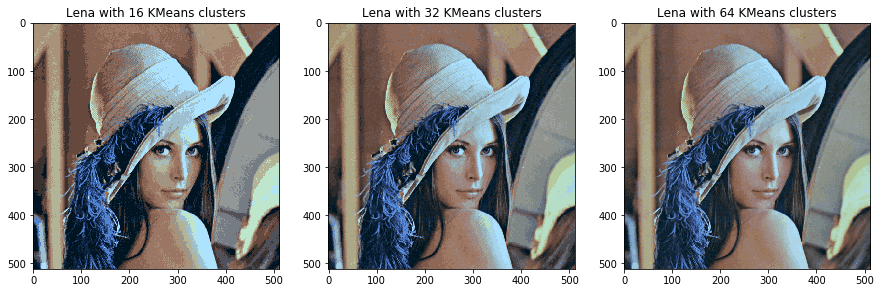

In [62]:
ssws33 = test_cluster_size(standard_lena_2D_arr, [16,32,64])

In [63]:
print('CIS 545 Cell Padding')

CIS 545 Cell Padding


The code below references all of the outputs that we will grade in this notebook. Therefore, this cell should run to completion when you "Restart & Run All" from the Kernel menu.

In [64]:
print("lena_3D_arr.shape is", lena_3D_arr.shape)
print("lena_2D_arr.shape is", lena_2D_arr.shape)
print("minmax_lena_3D_arr is", minmax_lena_3D_arr.shape)
print("standard_lena_3D_arr.shape is", standard_lena_3D_arr.shape)
print("cutoff is", cutoff)
print("pca_lena_3D_arr.shape is", pca_lena_3D_arr.shape)
print("nmf_lena_3D_arr.shape is", nmf_lena_3D_arr.shape)
print("The SSWs I got in 3.1 are", ssws31)
print("The SSWs I got in 3.2 are", ssws32)
print("The khat I chose in 3.3 is", khat33)
print("The grand mean of original Lena is", original_grand_mean)
print("The khat I chose in 4.3 is", khat43)

lena_3D_arr.shape is (512, 512, 3)
lena_2D_arr.shape is (262144, 3)
minmax_lena_3D_arr is (512, 512, 3)
standard_lena_3D_arr.shape is (512, 512, 3)
cutoff is 2
pca_lena_3D_arr.shape is (512, 512, 3)
nmf_lena_3D_arr.shape is (512, 512, 3)
The SSWs I got in 3.1 are [607199964, 338474714, 214463112, 166681913, 137570878, 118858794, 104748826]
The SSWs I got in 3.2 are [491043533, 277136351, 178987369, 142930183, 114486360, 101580781, 89660452]
The khat I chose in 3.3 is 4
The grand mean of original Lena is [180.22365952  99.05121613 105.41025162]
The khat I chose in 4.3 is 4
